In [1]:
%matplotlib inline

In [34]:
import torch
import numpy as np

from agent.agent import Agent
from functions import *
from envs import TradingEnv

stock_name = '^HSI'
window_size = 15

agent = Agent(window_size+1, True)
data = getStockDataVec(stock_name)
env = TradingEnv(data, window_size)
l = len(data) - 1
batch_size = 32

state = env.get_state(0)
total_profit = 0
env.inventory = [(data[0],0), (data[1],1)]
closes = []
buys = []
sells = []
capital = 1000000
actions = np.zeros(l)
for t in range(l):
    action = agent.act(state)
    actions[t] = action
    closes.append(data[t])

    # sit
    next_state = env.get_state(t+1)
    reward = 0

    if action == 1: # buy
        if capital > data[t]:
            env.buy(t)
            buys.append(data[t])
            sells.append(None)
            capital -= data[t]
        else:
            buys.append(None)
            sells.append(None)

    elif action == 2: # sell
        if len(env.inventory) > 0:
            reward, profit = env.sell(t)
            total_profit += profit
            buys.append(None)
            sells.append(data[t])
            capital += data[t]
        else:
            buys.append(None)
            sells.append(None)
    elif action == 0:
        buys.append(None)
        sells.append(None)

    done = True if t == l - 1 else False
    agent.memory.push(state, action, next_state, reward)
    state = next_state

    if done:
        print("--------------------------------")
        print(stock_name + " Total Profit: " + formatPrice(total_profit))
        print("--------------------------------")


/Users/anthonycuturrufo/Documents/School/4701/Repo/DeepQL_Stock_Trader/functions.py:31: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


--------------------------------
^HSI Total Profit: $588.20
--------------------------------


In [35]:
len(closes)

7413

In [36]:
actions

array([0., 0., 0., ..., 0., 0., 0.])

In [37]:
sell_idx = np.where(actions == 2.0)
len(sell_idx[0])

75

In [38]:
sell_signals = np.full(len(closes), None)
for i, a in enumerate(actions): 
    if a == 2:
        sell_signals[i] = closes[i]
    else: 
        sell_signals[i] = None


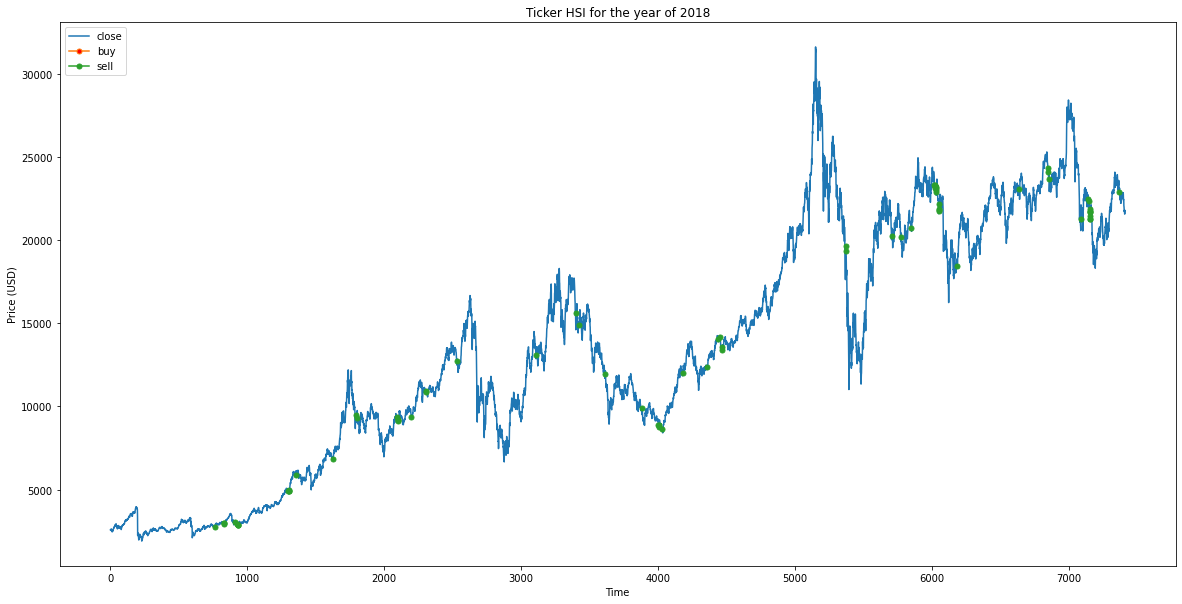

In [39]:
import matplotlib.pyplot as plt
import numpy as np


x_data = range(l)

# From here the plotting starts

plt.figure(figsize=(20, 10))
plt.plot(x_data, closes)
plt.plot(x_data, buys, marker='o', markersize=5, markerfacecolor='r')
#plt.plot(x_data,  sells, marker='o', markersize=8, )
plt.plot(x_data, sell_signals, marker = 'o', markersize=5)
plt.title("Ticker HSI for the year of 2018")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend(['close', 'buy', 'sell'], loc='upper left')
plt.savefig('images/PandL_LinearPunishDtPerformance2018HSISTATE-SMA.pdf')  
plt.show()